In [23]:
import matplotlib.pyplot as plt
# from netCDF4 import Dataset
import numpy as np
import os
import rasterio as rio
import geopandas as gpd
import xarray as xr
import pickle
import rasterio
import datetime as dt
import pandas
import rioxarray as rxr
import matplotlib.ticker as ticker

os.chdir('c:/users/marianne/documents/pe_snow_fires')
from constants import *

In [17]:
dir = 'c:/users/marianne/documents/data/GOSIF/data.globalecology.unh.edu/data/GOSIF-GPP_v2/Monthly/Mean'
all_sheds = all_sheds

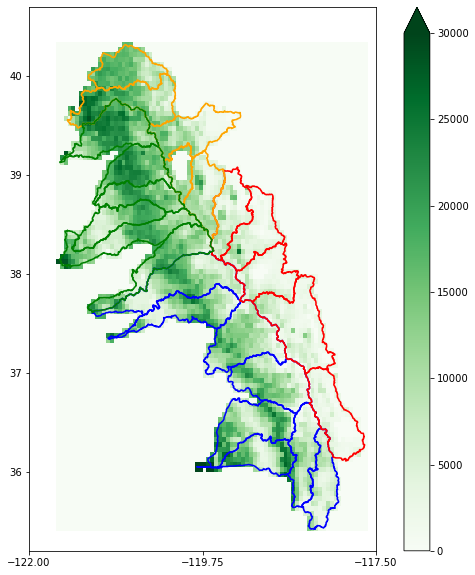

In [48]:
targets_sw = ['Upper San Joaquin','Upper Tuolumne','Upper King','Upper Merced','Upper Kaweah','Upper Kern','Upper Tule','South Fork Kern']
targets_se = ['West Walker','East Walker','Mono Lake','Crowley Lake','Owens Lake','Indian Wells-Searles Valley']
targets_ne = ['East Branch North Fork Feather','Middle Fork Feather','Truckee','Lake Tahoe','Upper Carson']
targets_nw = ['Upper Yuba','North Fork American','South Fork American','Upper Cosumnes','Upper Mokelumne','Upper Stanislaus']
targets_all = [targets_sw,targets_se,targets_ne,targets_nw]
fig,ax=plt.subplots(figsize=(10,10))
colors = ['blue','red','orange','green']
ax.set_title('GOSIF March 2005 g C/m2/mo')
ax.patch.set_facecolor('white')
for i,targets in enumerate(targets_all):
    sheds = sn_watersheds[sn_watersheds.name == targets[0]]
    all_sheds = all_sheds.append(sheds)
    for t in range(1,len(targets)):
        tmp = sn_watersheds[(sn_watersheds.name==targets[t])]
        try:
            tmp = tmp[tmp.index==tmp.index[0]]
        except:
            continue
        sheds = sheds.append(tmp)
        all_sheds = all_sheds.append(tmp)
    if(targets==targets_sw): sheds.boundary.plot(ax=ax, color = colors[i],alpha = 1)
    if(targets==targets_nw): sheds.boundary.plot(ax=ax, color = colors[i],alpha = 1)
    if(targets==targets_ne): sheds.boundary.plot(ax=ax, color = colors[i],alpha = 1)
    if(targets==targets_se): sheds.boundary.plot(ax=ax, color = colors[i],alpha = 1)


data = rxr.open_rasterio(dir + '/GOSIF_GPP_2005.M08_Mean.tif')
clipped = data.rio.clip(all_sheds.geometry,all_touched=True,crs=all_sheds.geometry.crs,from_disk=True).squeeze()
for i,v in enumerate(clipped):
    for k,val in enumerate(v):
        if val > 50000:
            clipped[i,k] = np.nan
clipped.plot(vmin=0, vmax = 30000, ax=ax,cmap = 'Greens')
ax.set_xbound([-122,-117.5])
ax.set_ybound([35.2,40.7])
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

In [69]:
sn = gpd.read_file('data/sn_watersheds.shp')
firebounds= gpd.read_file('data/firebounds.shp')
dates=[]
dataframe=[]
for f in os.listdir(dir):
    data = rioxarray.open_rasterio(dir +'/'+ f)
    clipped = data.rio.clip(sn.geometry,all_touched=True,crs=sn.geometry.crs)
    year = f.split('GPP_')[-1].split('.M')[0]
    month = f.split('GPP_')[-1].split('.M')[1].split('_Mean')[0]
    date = dt.datetime(year = int(year),month=int(month),day = 1)
    dataframe.append(clipped)
    dates.append(date)
    
    

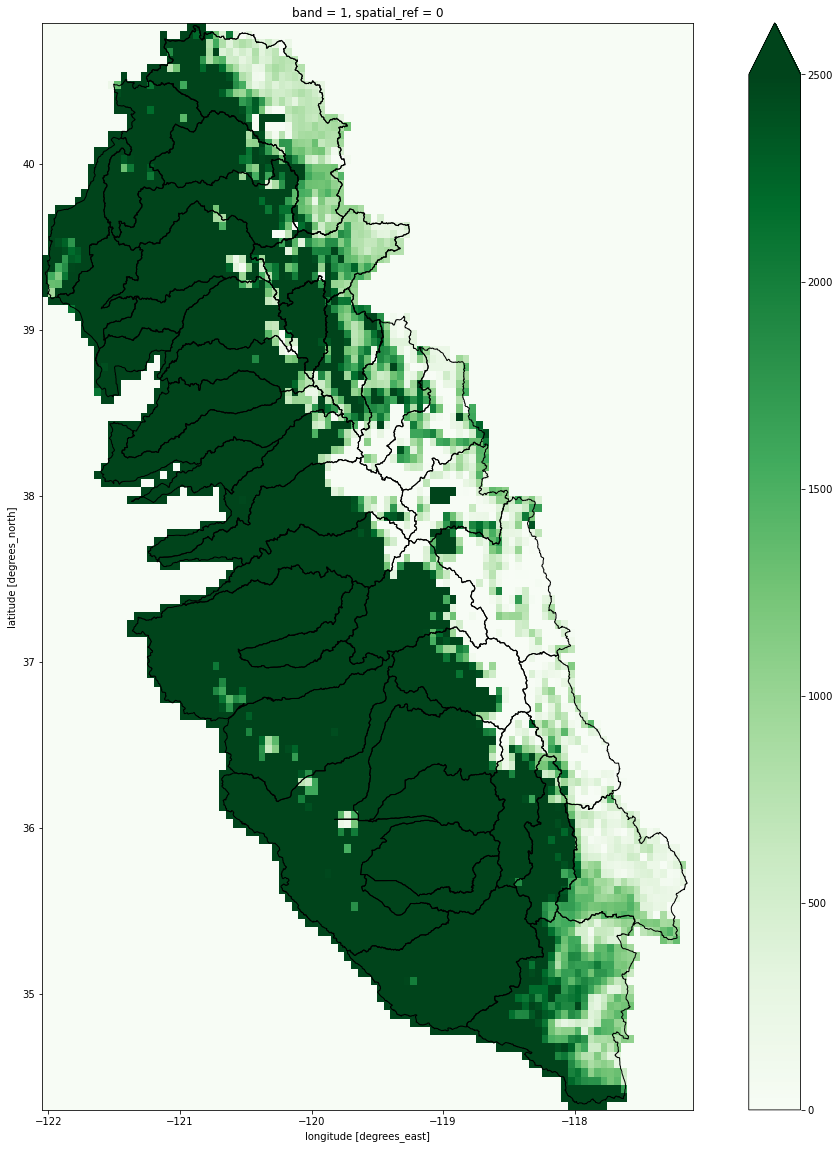

In [70]:
from rasterio.plot import plotting_extent

gosif_ext = plotting_extent(dataframe[0],
                            dataframe[0].rio.transform())

                            # View cropped data
f, ax = plt.subplots(figsize=(20,20))
dataframe[0].plot(ax=ax,cmap = 'Greens',vmin = 0,vmax=2500)
sn.boundary.plot(ax=ax, linewidth = 1,
                    color="black")
plt.show()